In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")


In [3]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.1
Pandas Version 1.2.4
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


In [4]:
df = pd.read_excel('Customer Churn Data.xlsx')

In [4]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [6]:
df.shape

(11260, 19)

In [7]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  11260 
no. of columns:  19


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [10]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [12]:
df['City_Tier'].unique()

array([ 3.,  1., nan,  2.])

In [13]:
df['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [14]:
df['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [15]:
df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [16]:
df['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [17]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [18]:
df['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [19]:
df['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [20]:
df['Tenure'].replace('#',np.NaN, inplace=True)
df['Account_user_count'].replace('@',np.NaN, inplace=True)
df['rev_per_month'].replace('+',np.NaN, inplace=True)
df['rev_growth_yoy'].replace('$',np.NaN, inplace=True)
df['coupon_used_for_payment'].replace('#',np.NaN, inplace=True)
df['Day_Since_CC_connect'].replace('$',np.NaN, inplace=True)
df['cashback'].replace('$',np.NaN, inplace=True)

In [21]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, nan, '$', 14,
       '*', 16], dtype=object)

In [22]:
df['coupon_used_for_payment'].replace('$',np.NaN, inplace=True)

In [23]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, nan, 14, '*', 16],
      dtype=object)

In [24]:
df['coupon_used_for_payment'].replace('*',np.NaN, inplace=True)

In [25]:
df['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [26]:
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [27]:
df['Account_user_count'].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [28]:
df['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [29]:
df['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [30]:
df['coupon_used_for_payment'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [31]:
df['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [32]:
df['cashback'].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [33]:
df.head(20)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.93,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.60,Mobile
5,20005,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.19,Computer
6,20006,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,120.86,Mobile
7,20007,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,122.93,Mobile
8,20008,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,126.83,Mobile
9,20009,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,122.93,Mobile


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [188]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
account_segment            0
Payment_Credit Card        0
Payment_Debit Card         0
Payment_E wallet           0
Payment_UPI                0
Gender_Male                0
Marital_Status_Married     0
Marital_Status_Single      0
Login_device_Mobile        0
dtype: int64

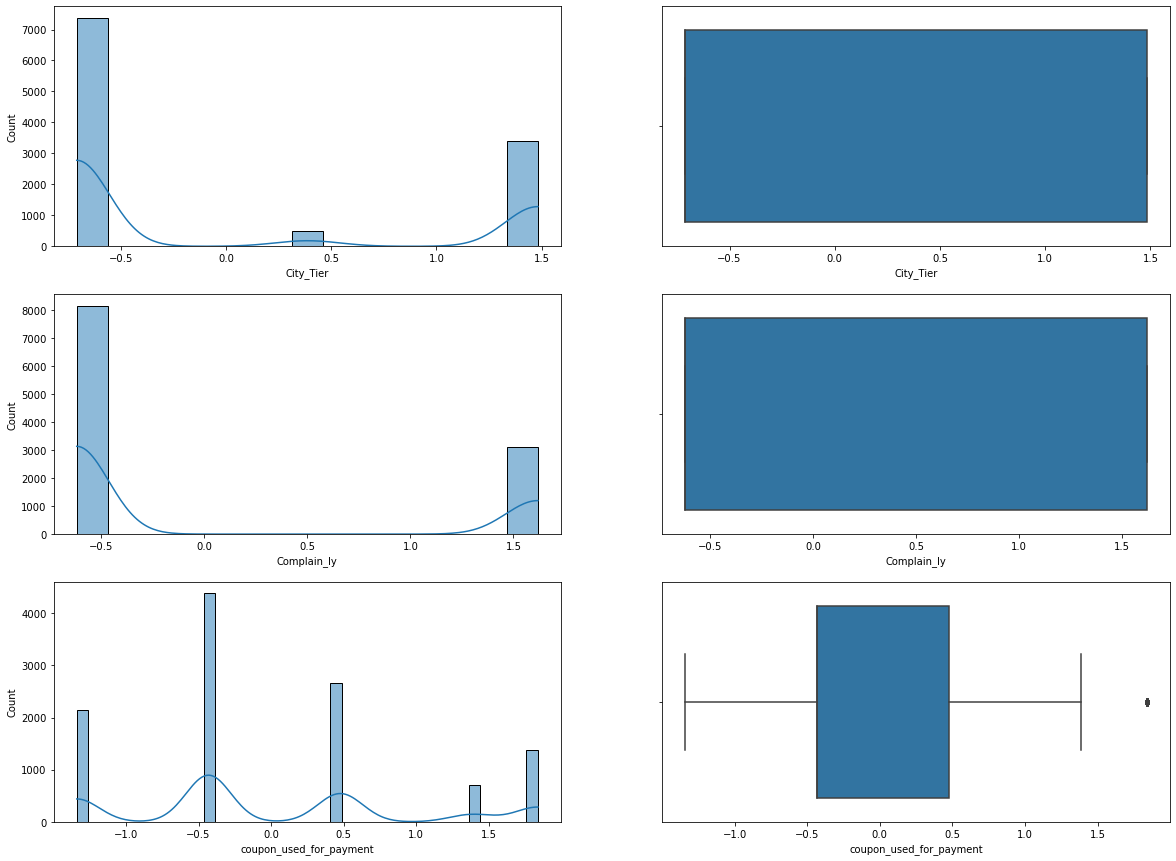

In [187]:
# Exploratory Data analysis
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df['City_Tier'], kde=True, ax=axes[0][0])
sns.boxplot(x='City_Tier', data=df, ax=axes[0][1])
sns.histplot(df['Complain_ly'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Complain_ly', data=df , ax=axes[1][1])
sns.histplot(df['coupon_used_for_payment'] , kde=True, ax=axes[2][0])
sns.boxplot(x='coupon_used_for_payment', data=df , ax=axes[2][1])

plt.show()

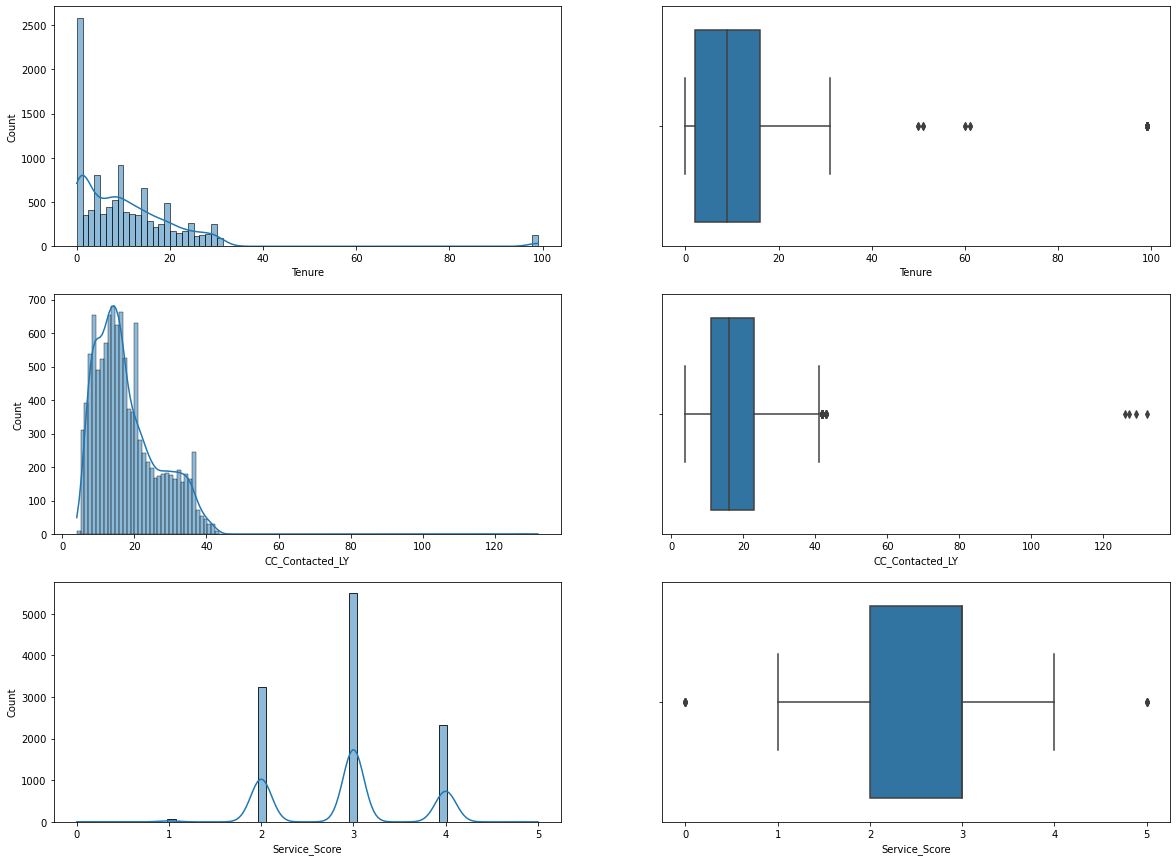

In [37]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df['Tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='Tenure', data=df, ax=axes[0][1])
sns.histplot(df['CC_Contacted_LY'] , kde=True, ax=axes[1][0])
sns.boxplot(x='CC_Contacted_LY', data=df , ax=axes[1][1])
sns.histplot(df['Service_Score'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Service_Score', data=df , ax=axes[2][1])
plt.show()

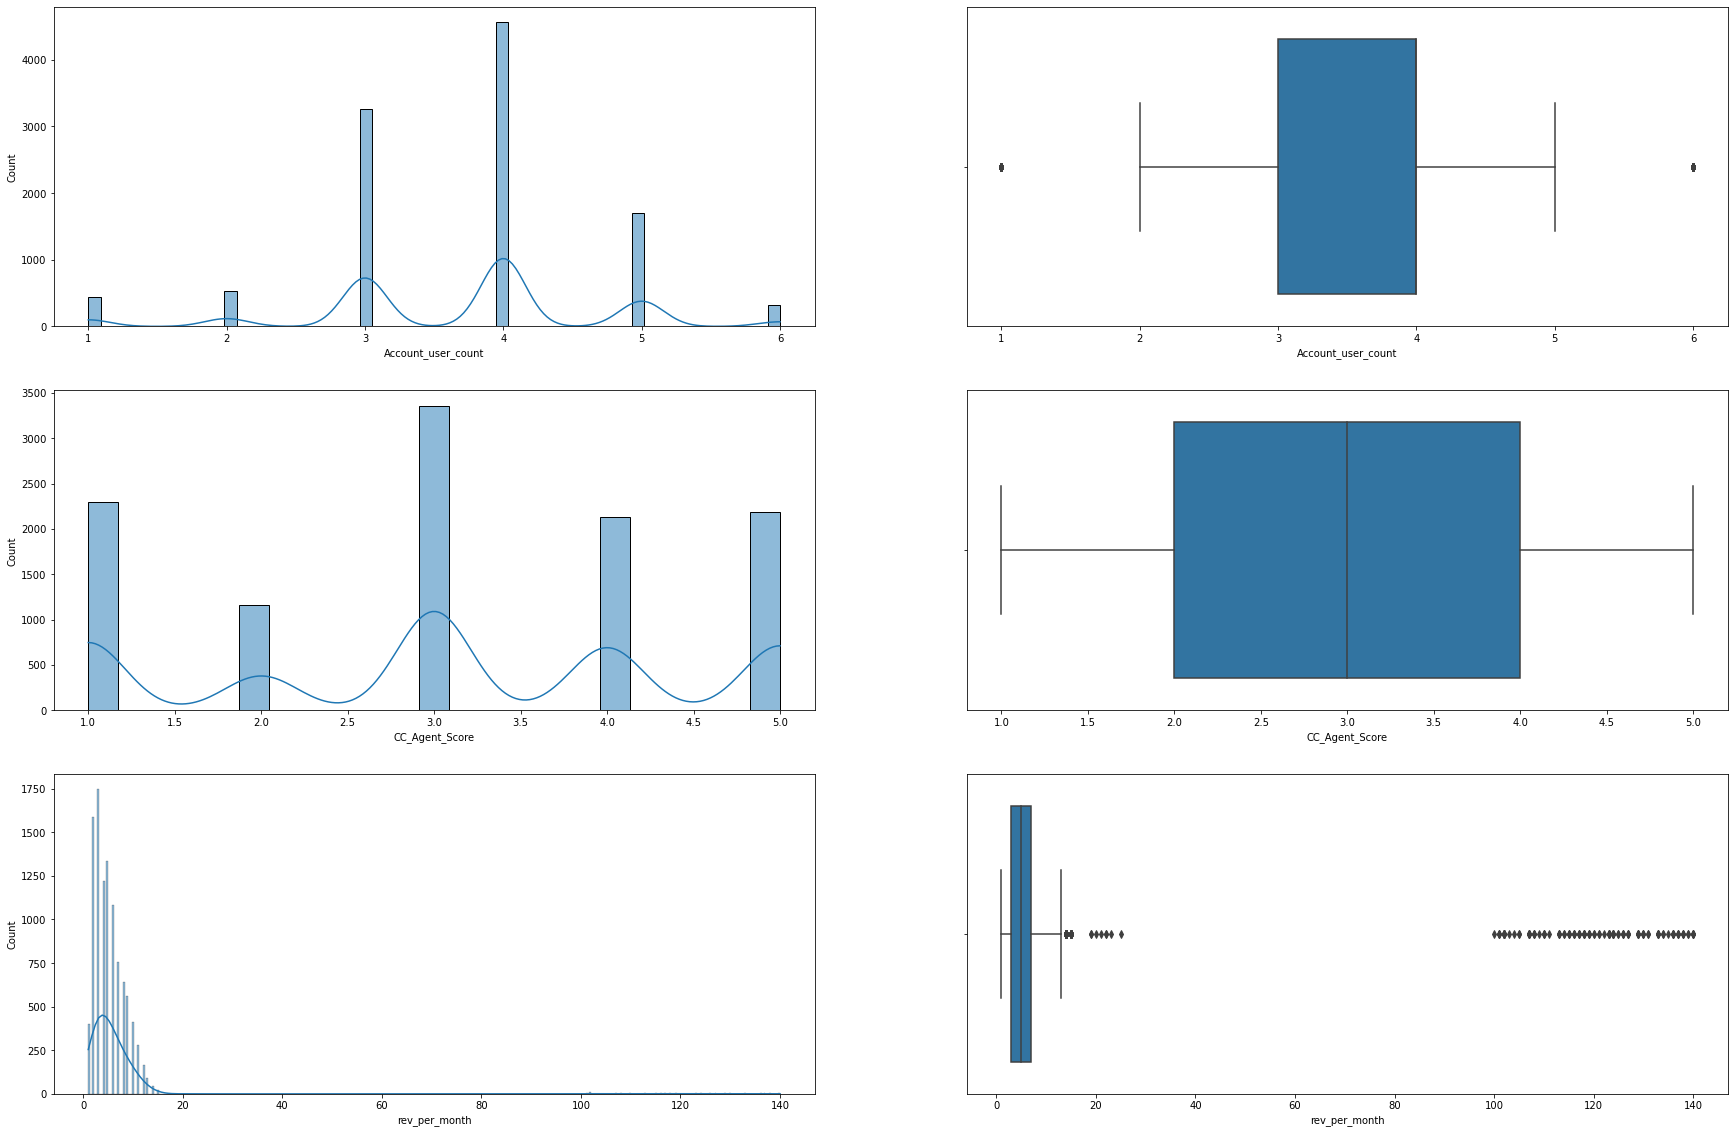

In [38]:
fig,axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(30,20)
sns.histplot(df['Account_user_count'] , kde=True, ax=axes[0][0])
sns.boxplot(x='Account_user_count', data=df , ax=axes[0][1])
sns.histplot(df['CC_Agent_Score'] , kde=True, ax=axes[1][0])
sns.boxplot(x='CC_Agent_Score', data=df , ax=axes[1][1])
sns.histplot(df['rev_per_month'] , kde=True, ax=axes[2][0])
sns.boxplot(x='rev_per_month', data=df , ax=axes[2][1])


plt.show()

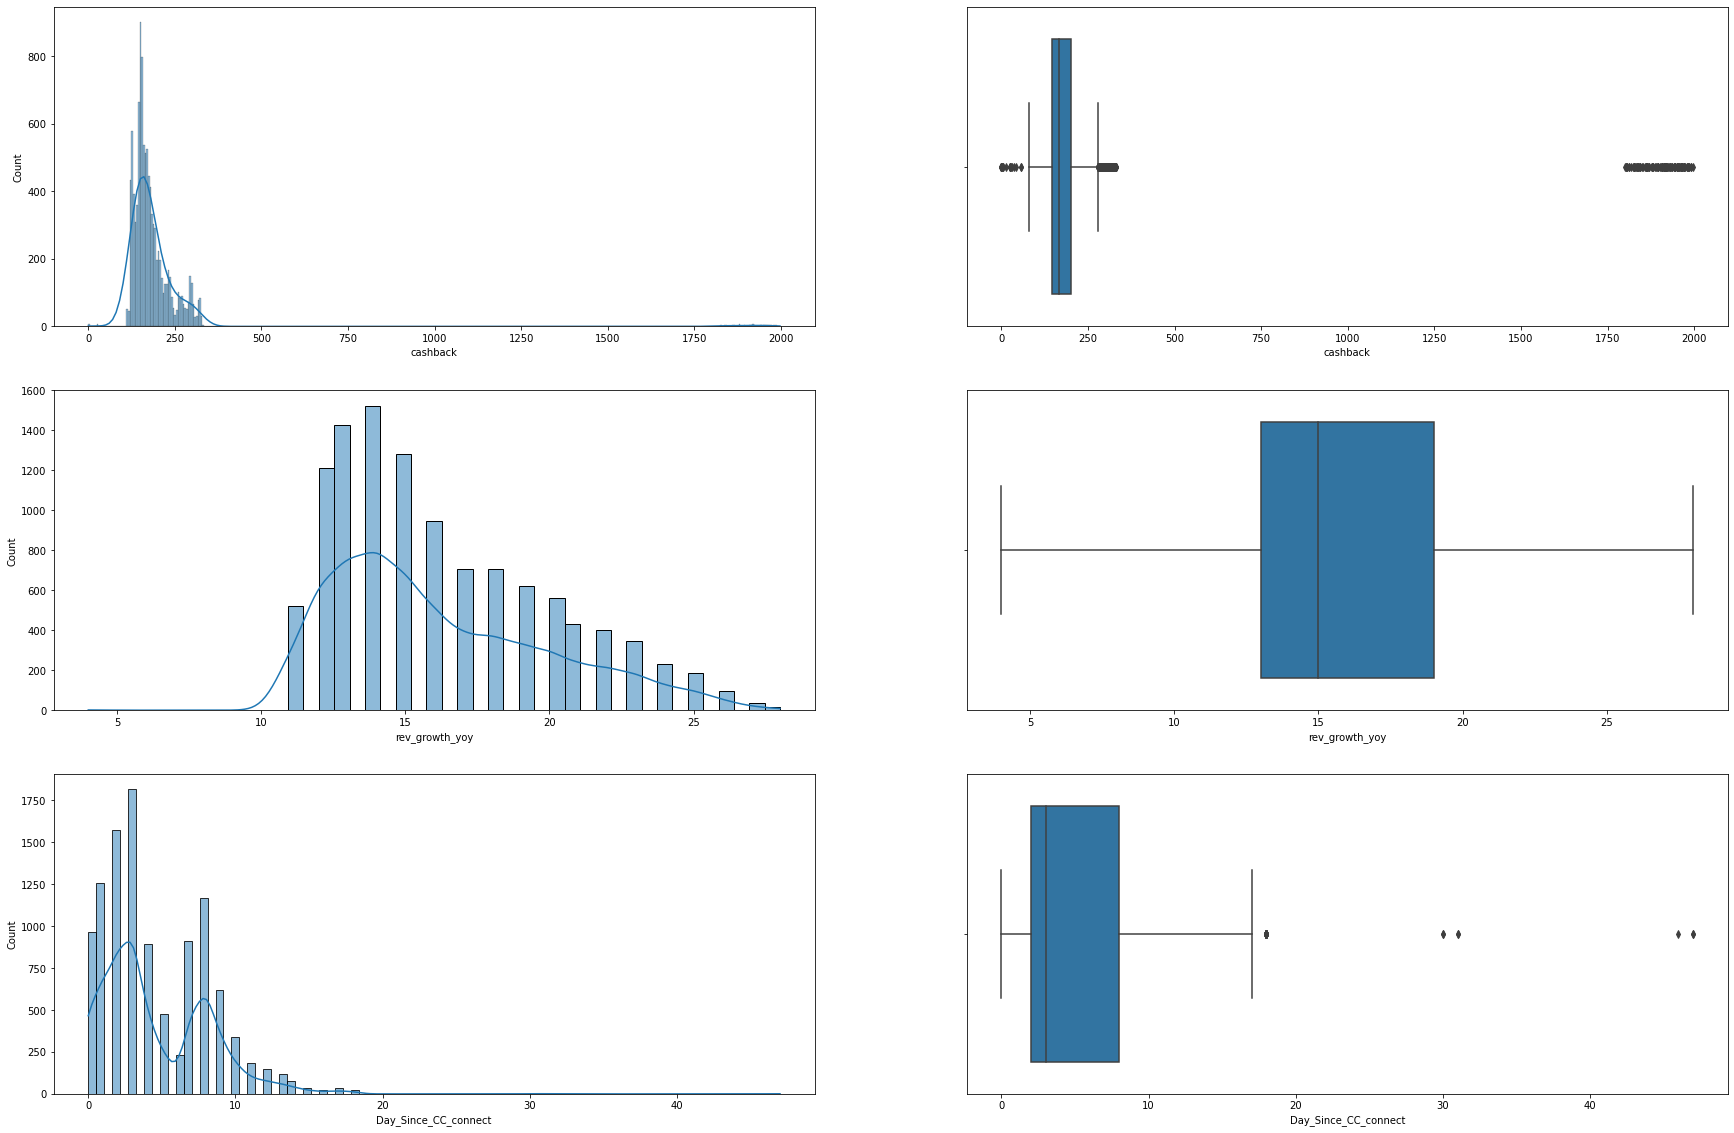

In [39]:
fig,axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(30,20)
sns.histplot(df['cashback'] , kde=True, ax=axes[0][0])
sns.boxplot(x='cashback', data=df , ax=axes[0][1])
sns.histplot(df['rev_growth_yoy'] , kde=True, ax=axes[1][0])
sns.boxplot(x='rev_growth_yoy', data=df , ax=axes[1][1])
sns.histplot(df['Day_Since_CC_connect'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Day_Since_CC_connect', data=df , ax=axes[2][1])

plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

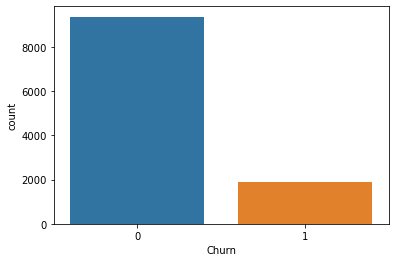

In [40]:
# Univariate Analysis
sns.countplot(x='Churn', data=df)

In [41]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

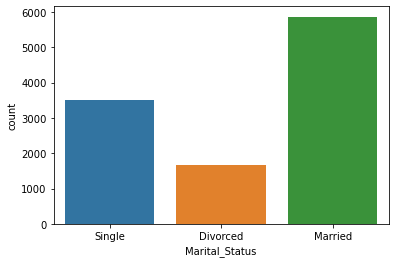

In [42]:
sns.countplot(x='Marital_Status', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

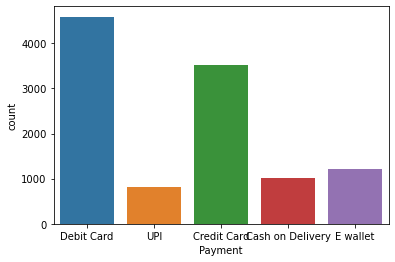

In [43]:
sns.countplot (x='Payment', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

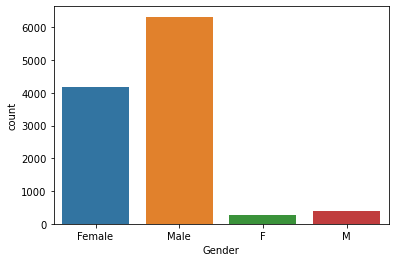

In [44]:
sns.countplot (x='Gender', data=df)

In [45]:
df['Gender'] = df['Gender'].replace({'F': 'Female','M': 'Male'})


In [46]:
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

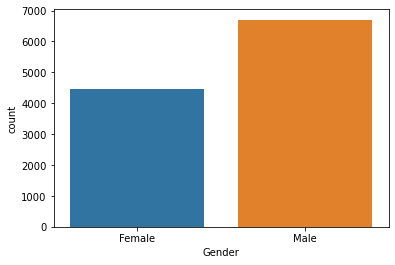

In [47]:
sns.countplot (x='Gender', data=df)

<AxesSubplot:xlabel='account_segment', ylabel='count'>

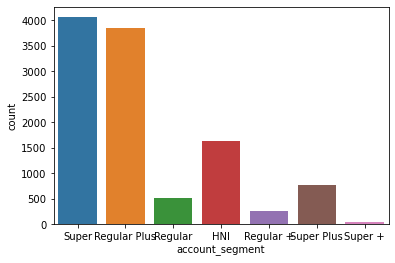

In [48]:
sns.countplot (x='account_segment', data=df)

In [49]:
df['account_segment'].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [50]:
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus','Super +': 'Super Plus'})

In [51]:
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

<AxesSubplot:xlabel='account_segment', ylabel='count'>

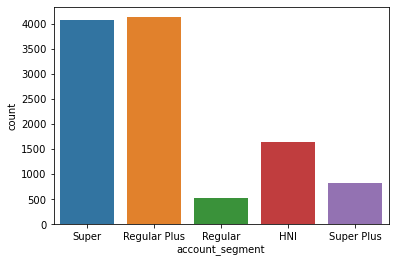

In [52]:
sns.countplot (x='account_segment', data=df)

<AxesSubplot:xlabel='Login_device', ylabel='count'>

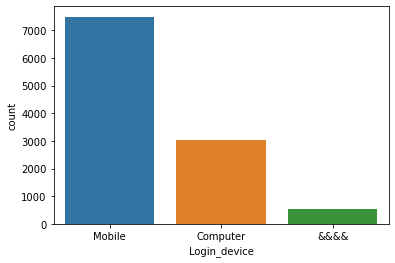

In [53]:
sns.countplot (x='Login_device', data=df)

In [54]:
df['Login_device'].value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [55]:
df['Login_device'].mode()

0    Mobile
dtype: object

In [56]:
df['Login_device'].replace('&&&&',df['Login_device'].mode()[0], inplace=True)

In [57]:
df['Login_device'].value_counts()

Mobile      8021
Computer    3018
Name: Login_device, dtype: int64

<AxesSubplot:xlabel='Login_device', ylabel='count'>

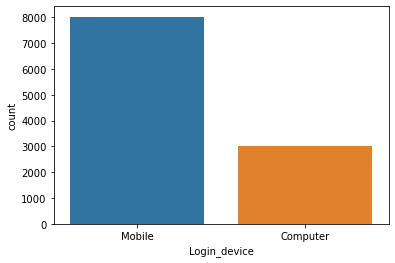

In [58]:
sns.countplot (x='Login_device', data=df)

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

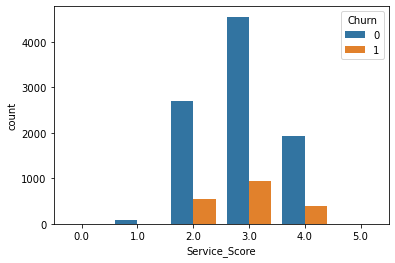

In [59]:
# Bivariate Analysis
sns.countplot (x='Service_Score',hue= 'Churn', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

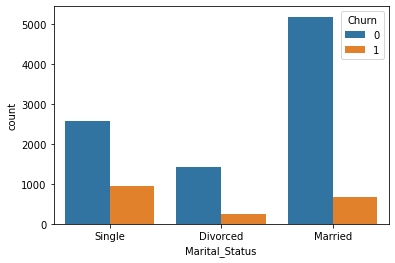

In [60]:
sns.countplot (x='Marital_Status',hue= 'Churn', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

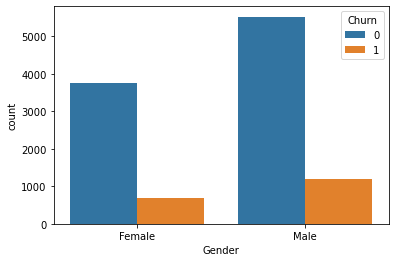

In [61]:
sns.countplot (x='Gender', hue='Churn', data=df)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

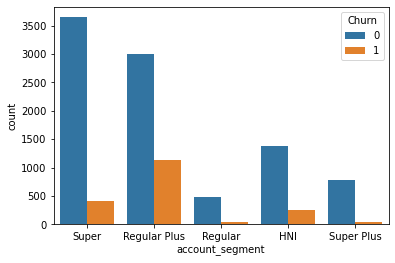

In [62]:
dx=sns.countplot(x= 'account_segment', hue="Churn", data = df)
dx.bar_label(dx.containers[1])

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

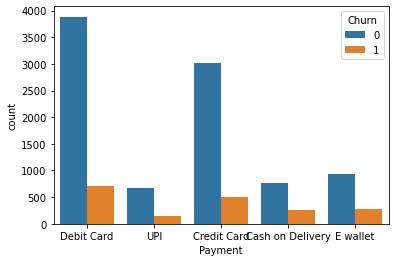

In [63]:
ax=sns.countplot(x = 'Payment',hue="Churn",data = df)    
ax.bar_label(ax.containers[1])

<AxesSubplot:xlabel='Login_device', ylabel='count'>

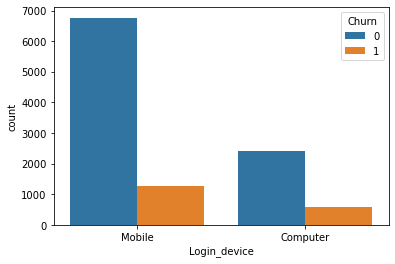

In [64]:
sns.countplot (x='Login_device', hue='Churn', data=df)

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

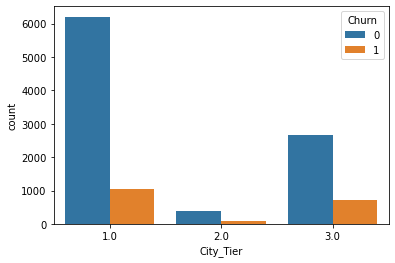

In [65]:
sns.countplot (x='City_Tier', hue='Churn', data=df)

<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='count'>

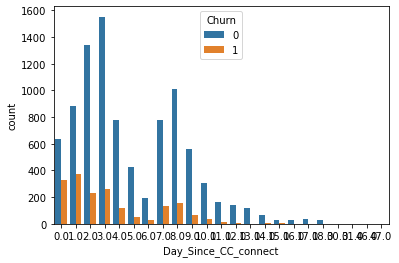

In [66]:
sns.countplot (x='Day_Since_CC_connect', hue='Churn', data=df)

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

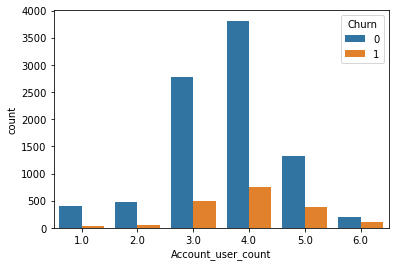

In [67]:
sns.countplot (x='Account_user_count', hue='Churn', data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

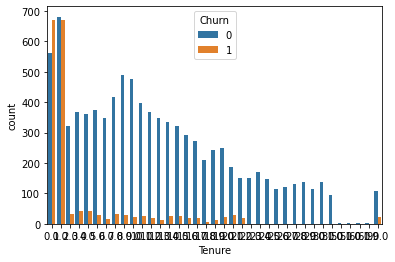

In [68]:
sns.countplot (x='Tenure', hue='Churn', data=df)

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

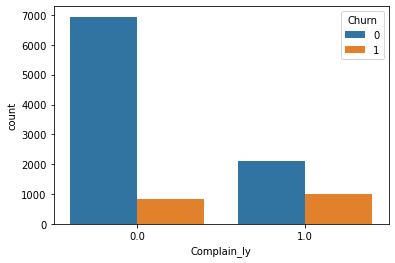

In [5]:
sns.countplot (x='Complain_ly', hue='Churn', data=df)

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

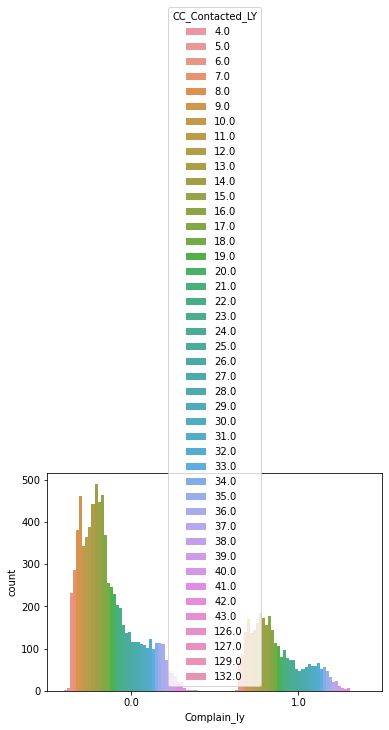

In [6]:
sns.countplot (x='Complain_ly', hue='CC_Contacted_LY', data=df)

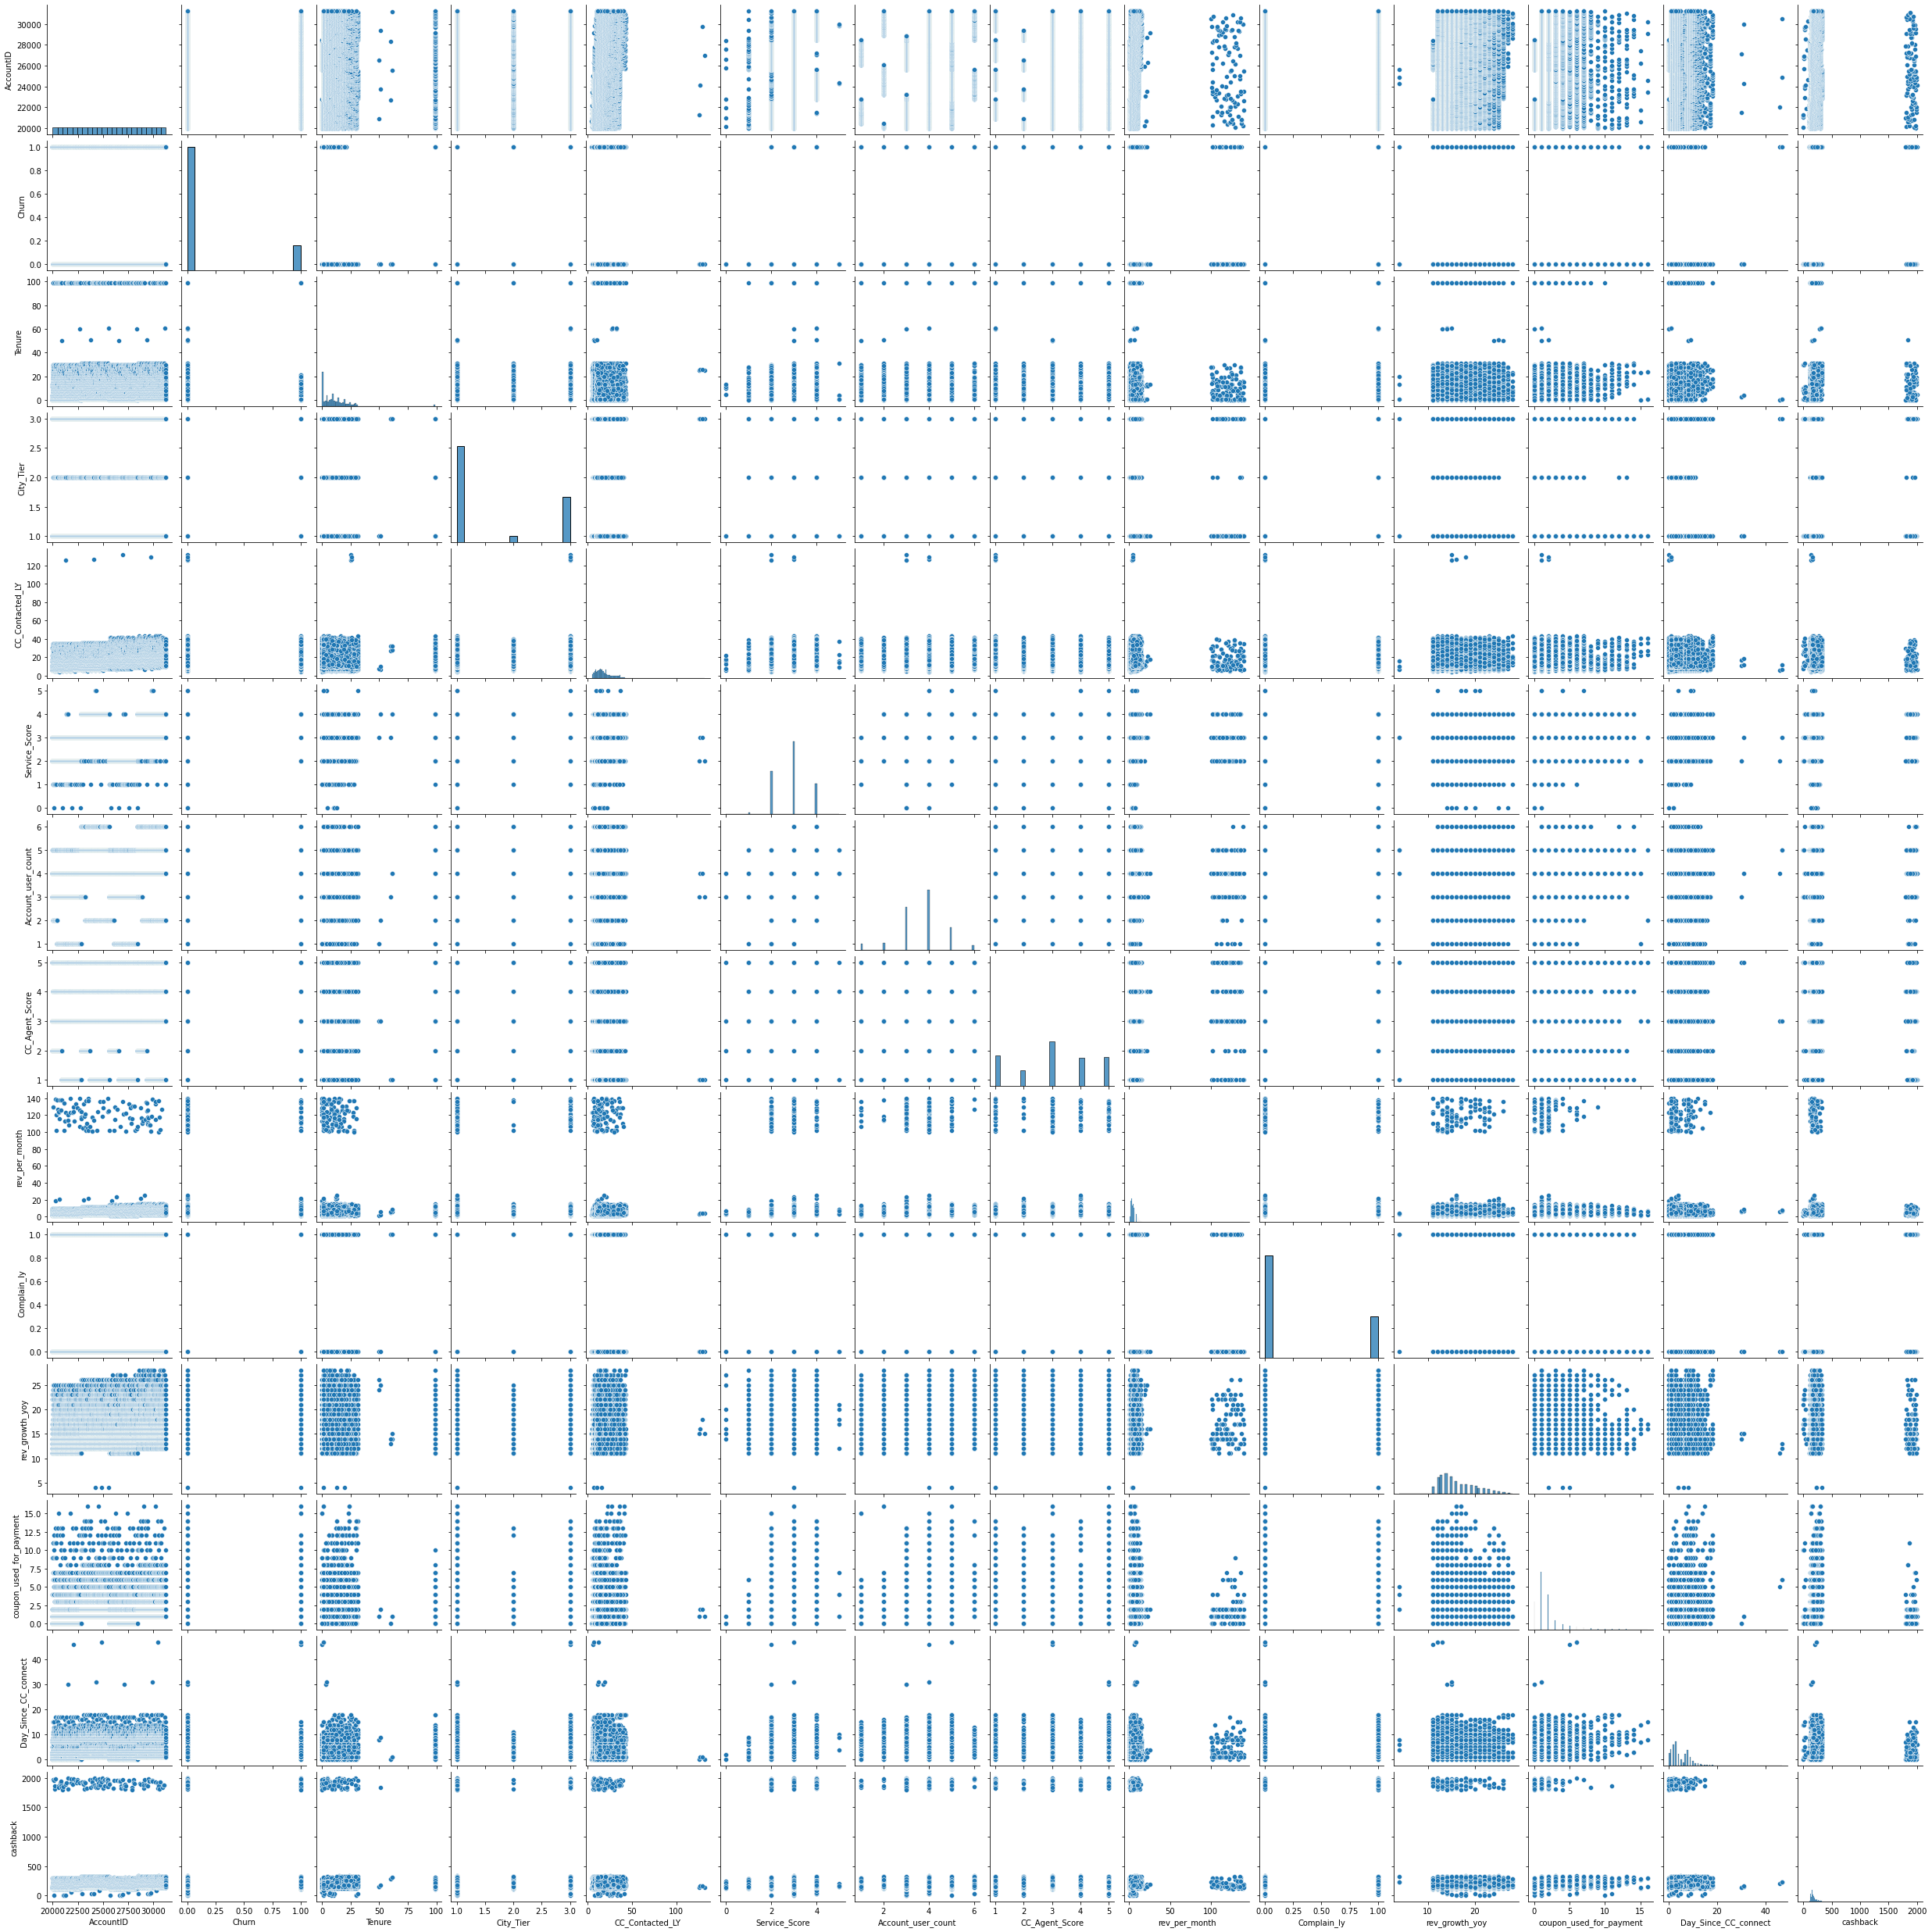

In [69]:
# Multivariate Analysis
sns.pairplot(df)

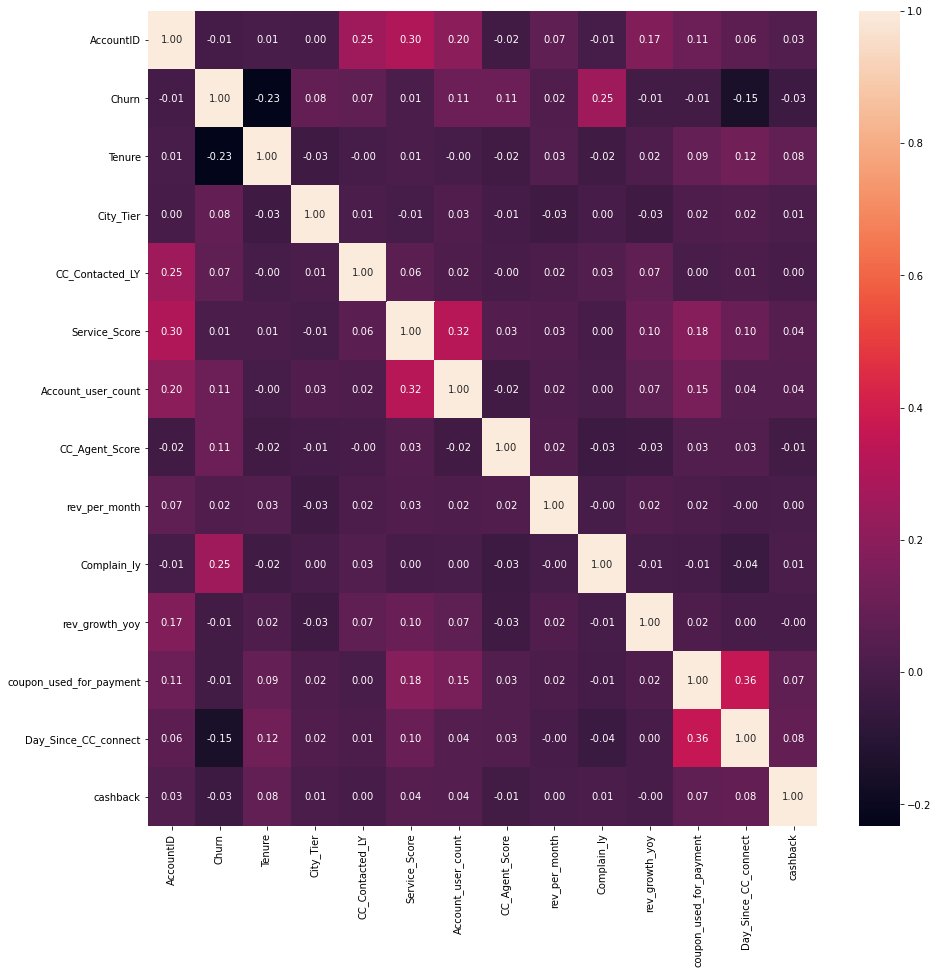

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [71]:

df.drop(['AccountID'], axis=1, inplace=True)

In [72]:
df.shape

(11260, 18)

In [73]:

df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [75]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [76]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Payment          11151 non-null  object
 1   Gender           11152 non-null  object
 2   account_segment  11163 non-null  object
 3   Marital_Status   11048 non-null  object
 4   Login_device     11039 non-null  object
dtypes: object(5)
memory usage: 440.0+ KB


In [77]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Service_Score            11162 non-null  float64
 5   Account_user_count       10816 non-null  float64
 6   CC_Agent_Score           11144 non-null  float64
 7   rev_per_month            10469 non-null  float64
 8   Complain_ly              10903 non-null  float64
 9   rev_growth_yoy           11257 non-null  float64
 10  coupon_used_for_payment  11257 non-null  float64
 11  Day_Since_CC_connect     10902 non-null  float64
 12  cashback                 10787 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.1 MB


In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [79]:
df_cat = pd.DataFrame(imputer.fit_transform(df_cat), columns=df_cat.columns)

In [80]:
df_cat.isnull().sum()

Payment            0
Gender             0
account_segment    0
Marital_Status     0
Login_device       0
dtype: int64

In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

In [82]:
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

In [83]:
df_num.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
dtype: int64

In [84]:
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')

In [85]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,11260.0,10.985879,12.757534,0.0,2.00,9.00,16.00,99.0
City_Tier,11260.0,1.647425,0.912763,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.00,16.00,23.00,132.0
Service_Score,11260.0,2.903375,0.722476,0.0,2.00,3.00,3.00,5.0
Account_user_count,11260.0,3.704973,1.004383,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11260.0,3.065808,1.372663,1.0,2.00,3.00,4.00,5.0
rev_per_month,11260.0,6.266874,11.488990,1.0,3.00,5.00,7.00,140.0
Complain_ly,11260.0,0.276288,0.447181,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11260.0,16.193073,3.757271,4.0,13.00,15.00,19.00,28.0


In [86]:
df = df_new

In [87]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,Super,Single,Mobile
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,Regular Plus,Single,Mobile
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,Regular Plus,Single,Mobile
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,Super,Single,Mobile
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,Regular Plus,Single,Mobile


In [88]:
df.shape

(11260, 18)

In [89]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Service_Score              0
Account_user_count         0
CC_Agent_Score             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Payment                    0
Gender                     0
account_segment            0
Marital_Status             0
Login_device               0
dtype: int64

In [90]:
# Outlier treatment
def remove_outlier (col):
    sorted (col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

In [91]:
lr,ur=remove_outlier(df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']>ur,ur,df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']<lr,lr,df['coupon_used_for_payment'])

lr,ur=remove_outlier(df['Tenure'])
df['Tenure']=np.where(df['Tenure']>ur,ur,df['Tenure'])
df['Tenure']=np.where(df['Tenure']<lr,lr,df['Tenure'])

lr,ur=remove_outlier(df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']>ur,ur,df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']<lr,lr,df['CC_Contacted_LY'])

lr,ur=remove_outlier(df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']>ur,ur,df['Service_Score'])
df['Service_Score']=np.where(df['Service_Score']<lr,lr,df['Service_Score'])

lr,ur=remove_outlier(df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']>ur,ur,df['Account_user_count'])
df['Account_user_count']=np.where(df['Account_user_count']<lr,lr,df['Account_user_count'])

lr,ur=remove_outlier(df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']>ur,ur,df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']<lr,lr,df['rev_per_month'])

lr,ur=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>ur,ur,df['cashback'])
df['cashback']=np.where(df['cashback']<lr,lr,df['cashback'])

lr,ur=remove_outlier(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']>ur,ur,df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']<lr,lr,df['Day_Since_CC_connect'])

<AxesSubplot:xlabel='coupon_used_for_payment'>

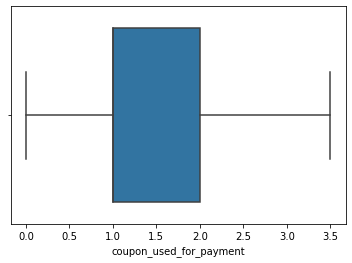

In [92]:
sns.boxplot(x=df.coupon_used_for_payment)


<AxesSubplot:xlabel='Tenure'>

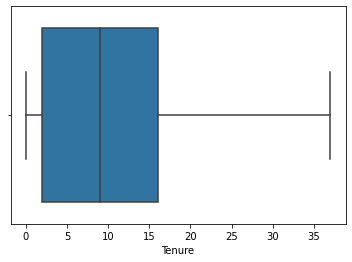

In [93]:
sns.boxplot(x=df.Tenure)

<AxesSubplot:xlabel='CC_Contacted_LY'>

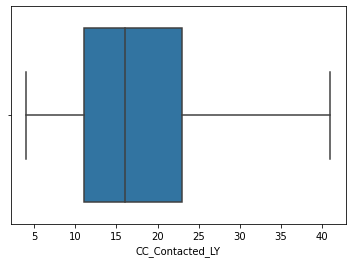

In [94]:
sns.boxplot(x=df.CC_Contacted_LY)

<AxesSubplot:xlabel='Service_Score'>

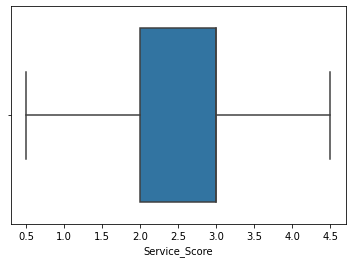

In [95]:
sns.boxplot(x=df.Service_Score)

<AxesSubplot:xlabel='Account_user_count'>

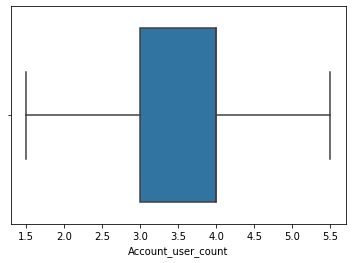

In [96]:
sns.boxplot(x=df.Account_user_count)

<AxesSubplot:xlabel='rev_per_month'>

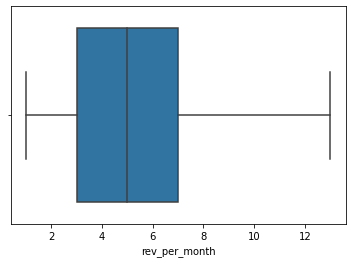

In [97]:
sns.boxplot(x=df.rev_per_month)

<AxesSubplot:xlabel='cashback'>

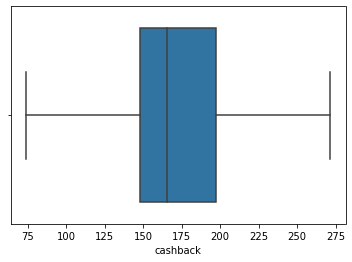

In [98]:
sns.boxplot(x=df.cashback)

<AxesSubplot:xlabel='Day_Since_CC_connect'>

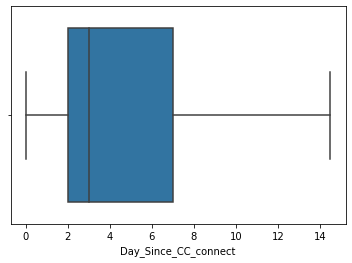

In [99]:
sns.boxplot(x=df.Day_Since_CC_connect)

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
label_encoder = LabelEncoder()

In [102]:
print(label_encoder)

LabelEncoder()


In [103]:
df["account_segment"] = label_encoder.fit_transform(df["account_segment"])

In [104]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,159.93,Debit Card,Female,3,Single,Mobile
1,1.0,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,120.90,UPI,Male,2,Single,Mobile
2,1.0,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,165.25,Debit Card,Male,2,Single,Mobile
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.07,Debit Card,Male,3,Single,Mobile
4,1.0,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,129.60,Credit Card,Male,2,Single,Mobile


In [105]:
df['account_segment'].value_counts()

2    4221
3    4062
0    1639
4     818
1     520
Name: account_segment, dtype: int64

In [106]:
# Scaling the data using Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# get numeric data
num_d = df.select_dtypes(exclude=['object'])
num_d=num_d.drop("Churn",axis=1)
# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

In [107]:
df

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1.0,-0.703315,1.481914,-1.379652,0.133911,-0.769057,-0.776488,1.302037,1.618461,-1.382201,-0.431239,0.129884,-0.398295,Debit Card,Female,0.743123,Single,Mobile
1,1.0,-1.153334,-0.709334,-1.146110,0.133911,0.312917,-0.047944,0.607469,1.618461,-0.317551,-1.338515,-1.301411,-1.294067,UPI,Male,-0.150848,Single,Mobile
2,1.0,-1.153334,-0.709334,1.422855,-1.253882,0.312917,-0.047944,0.260185,1.618461,-0.583714,-1.338515,-0.442634,-0.276197,Debit Card,Male,-0.150848,Single,Mobile
3,1.0,-1.153334,1.481914,-0.328712,-1.253882,0.312917,1.409143,0.954753,-0.617871,1.811748,-1.338515,-0.442634,-0.991804,Debit Card,Male,0.743123,Single,Mobile
4,1.0,-1.153334,-0.709334,-0.679025,-1.253882,-0.769057,1.409143,-0.781666,-0.617871,-1.382201,-0.431239,-0.442634,-1.094395,Credit Card,Male,-0.150848,Single,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,-0.028286,-0.709334,1.889940,0.133911,-1.851031,-1.505031,1.302037,-0.617871,0.747099,-0.431239,-0.156375,-0.541050,Credit Card,Male,0.743123,Married,Computer
11256,0.0,0.309228,-0.709334,0.138373,0.133911,1.394891,1.409143,0.607469,-0.617871,-0.051389,-0.431239,0.988662,1.138953,Credit Card,Male,-1.938788,Married,Mobile
11257,0.0,-1.040829,-0.709334,-0.445483,0.133911,-1.851031,0.680599,0.607469,1.618461,1.545586,-0.431239,-0.156375,0.324427,Debit Card,Male,0.743123,Married,Mobile
11258,0.0,1.434276,1.481914,-0.795796,1.521703,1.394891,0.680599,0.607469,-0.617871,-0.051389,0.476038,1.274921,0.060033,Credit Card,Male,0.743123,Married,Computer


In [108]:
# Encoding of categorical variables
df=pd.get_dummies(df, columns=['Payment','Gender','Marital_Status','Login_device'], drop_first=True)
df

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,cashback,account_segment,Payment_Credit Card,Payment_Debit Card,Payment_E wallet,Payment_UPI,Gender_Male,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1.0,-0.703315,1.481914,-1.379652,0.133911,-0.769057,-0.776488,1.302037,1.618461,-1.382201,...,-0.398295,0.743123,0,1,0,0,0,0,1,1
1,1.0,-1.153334,-0.709334,-1.146110,0.133911,0.312917,-0.047944,0.607469,1.618461,-0.317551,...,-1.294067,-0.150848,0,0,0,1,1,0,1,1
2,1.0,-1.153334,-0.709334,1.422855,-1.253882,0.312917,-0.047944,0.260185,1.618461,-0.583714,...,-0.276197,-0.150848,0,1,0,0,1,0,1,1
3,1.0,-1.153334,1.481914,-0.328712,-1.253882,0.312917,1.409143,0.954753,-0.617871,1.811748,...,-0.991804,0.743123,0,1,0,0,1,0,1,1
4,1.0,-1.153334,-0.709334,-0.679025,-1.253882,-0.769057,1.409143,-0.781666,-0.617871,-1.382201,...,-1.094395,-0.150848,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,-0.028286,-0.709334,1.889940,0.133911,-1.851031,-1.505031,1.302037,-0.617871,0.747099,...,-0.541050,0.743123,1,0,0,0,1,1,0,0
11256,0.0,0.309228,-0.709334,0.138373,0.133911,1.394891,1.409143,0.607469,-0.617871,-0.051389,...,1.138953,-1.938788,1,0,0,0,1,1,0,1
11257,0.0,-1.040829,-0.709334,-0.445483,0.133911,-1.851031,0.680599,0.607469,1.618461,1.545586,...,0.324427,0.743123,0,1,0,0,1,1,0,1
11258,0.0,1.434276,1.481914,-0.795796,1.521703,1.394891,0.680599,0.607469,-0.617871,-0.051389,...,0.060033,0.743123,1,0,0,0,1,1,0,0


In [109]:
# Train Test split
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 9232 to 1307
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   3378 non-null   float64
 1   City_Tier                3378 non-null   float64
 2   CC_Contacted_LY          3378 non-null   float64
 3   Service_Score            3378 non-null   float64
 4   Account_user_count       3378 non-null   float64
 5   CC_Agent_Score           3378 non-null   float64
 6   rev_per_month            3378 non-null   float64
 7   Complain_ly              3378 non-null   float64
 8   rev_growth_yoy           3378 non-null   float64
 9   coupon_used_for_payment  3378 non-null   float64
 10  Day_Since_CC_connect     3378 non-null   float64
 11  cashback                 3378 non-null   float64
 12  account_segment          3378 non-null   float64
 13  Payment_Credit Card      3378 non-null   uint8  
 14  Payment_Debit Card   

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 1393 to 1289
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   7882 non-null   float64
 1   City_Tier                7882 non-null   float64
 2   CC_Contacted_LY          7882 non-null   float64
 3   Service_Score            7882 non-null   float64
 4   Account_user_count       7882 non-null   float64
 5   CC_Agent_Score           7882 non-null   float64
 6   rev_per_month            7882 non-null   float64
 7   Complain_ly              7882 non-null   float64
 8   rev_growth_yoy           7882 non-null   float64
 9   coupon_used_for_payment  7882 non-null   float64
 10  Day_Since_CC_connect     7882 non-null   float64
 11  cashback                 7882 non-null   float64
 12  account_segment          7882 non-null   float64
 13  Payment_Credit Card      7882 non-null   uint8  
 14  Payment_Debit Card   

In [113]:
pd.DataFrame(y_train).value_counts()

Churn
0.0      6573
1.0      1309
dtype: int64

In [114]:
#import statsmodels.formula.api as SM
#df_train.columns
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#def calc_vif(X):

    #vif = pd.DataFrame()
    #vif["variables"] = X.columns
    #vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #return(vif)
    #calc_vif(X_train).sort_values(by = 'VIF', ascending = False)
    #model_1 = SM.logit(formula = f_1, data=df).fit()
    #model_1.summary()

In [115]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

0.887338239025628

 for train data
[[6379  194]
 [ 694  615]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6573
         1.0       0.76      0.47      0.58      1309

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



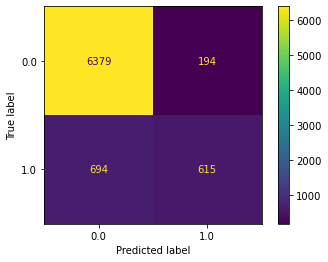

In [116]:
Logit_model = LogisticRegression()
Logit_model.fit(X_train,y_train)
y_train_predict = Logit_model.predict(X_train)
model_score = Logit_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(Logit_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8762581409117821

 for test data
[[2703   88]
 [ 330  257]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2791
         1.0       0.74      0.44      0.55       587

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.86      3378



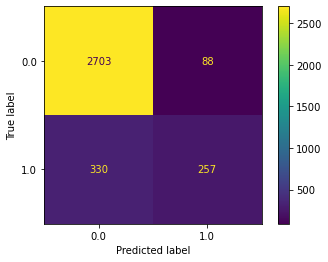

In [117]:
y_test_predict = Logit_model.predict(X_test)
model_score = Logit_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(Logit_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [118]:
ytest_predict_prob=Logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.378276,0.621724
1,0.862258,0.137742
2,0.983476,0.016524
3,0.987572,0.012428
4,0.978390,0.021610


In [119]:
logit_prob=Logit_model.predict_proba(X_test)
logit_prob

logit_auc_score=roc_auc_score(y_test,logit_prob[:,1])
logit_auc_score

0.8661504458538853

In [120]:
pred_class_train = Logit_model.predict(X_train)
pred_class_test = Logit_model.predict(X_test)

In [121]:
pred_prob_train = Logit_model.predict_proba(X_train)
pred_prob_test = Logit_model.predict_proba(X_test)

AUC for the Training Data: 0.876
AUC for the Test Data: 0.866


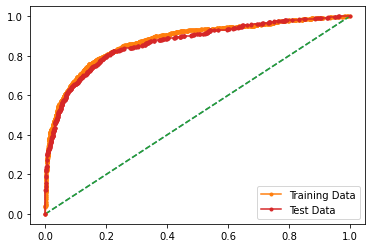

In [122]:
# AUC and ROC for the training data

# calculate AUC
lr_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lr_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lr_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lr_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [123]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

0.9780512560263892

 for train data
[[6526   47]
 [ 126 1183]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6573
         1.0       0.96      0.90      0.93      1309

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882



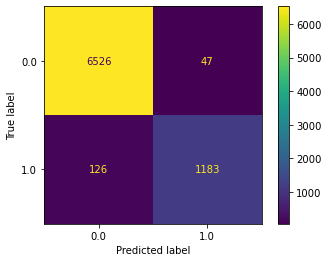

In [124]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(KNN_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9464179988158674

 for test data
[[2734   57]
 [ 124  463]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2791
         1.0       0.89      0.79      0.84       587

    accuracy                           0.95      3378
   macro avg       0.92      0.88      0.90      3378
weighted avg       0.95      0.95      0.95      3378



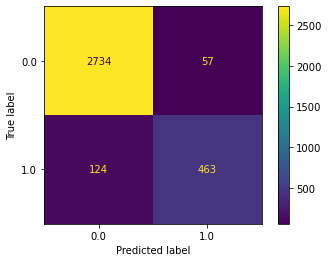

In [125]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(KNN_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [126]:
pred_class_train1 = KNN_model.predict(X_train)
pred_class_test1 = KNN_model.predict(X_test)

In [127]:
pred_prob_train1 = KNN_model.predict_proba(X_train)
pred_prob_test1 = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.996
AUC for the Test Data: 0.972


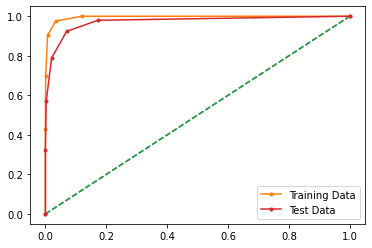

In [128]:
# AUC and ROC for the training data

# calculate AUC
KNN_train_auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % KNN_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
KNN_test_auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % KNN_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [129]:
#Decision Tree Classifier
from sklearn import tree

In [130]:
DT_model = tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

1.0

 for train data
[[6573    0]
 [   0 1309]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      1309

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



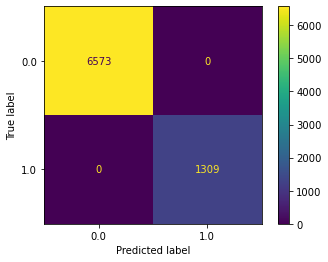

In [131]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(DT_model,X_train,y_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9404973357015985

 for test data
[[2684  107]
 [  94  493]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      2791
         1.0       0.82      0.84      0.83       587

    accuracy                           0.94      3378
   macro avg       0.89      0.90      0.90      3378
weighted avg       0.94      0.94      0.94      3378



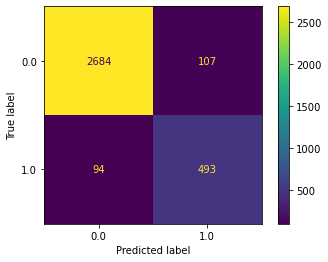

In [132]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(DT_model,X_test,y_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [133]:
pred_class_train2 = DT_model.predict(X_train)
pred_class_test2 = DT_model.predict(X_test)

In [134]:
pred_prob_train2 = DT_model.predict_proba(X_train)
pred_prob_test2 = DT_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.901


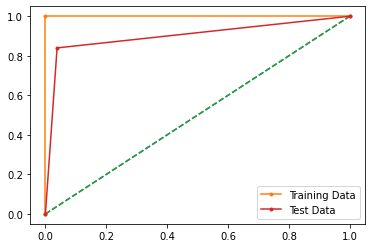

In [135]:
# AUC and ROC for the training data

# calculate AUC
DT_train_auc = metrics.roc_auc_score(y_train,pred_prob_train2[:,1])
print('AUC for the Training Data: %.3f' % DT_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
DT_test_auc = metrics.roc_auc_score(y_test,pred_prob_test2[:,1])
print('AUC for the Test Data: %.3f' % DT_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [136]:
fp=pd.DataFrame((DT_model.feature_importances_), columns = ["Imp"], index = X_train.columns)
fp.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.307343
Day_Since_CC_connect,0.070491
cashback,0.061800
CC_Agent_Score,0.055556
rev_growth_yoy,0.055277
Complain_ly,0.055264
CC_Contacted_LY,0.052818
City_Tier,0.052248
rev_per_month,0.048287
account_segment,0.041667


In [137]:
#Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

In [138]:
RF_model = RandomForestClassifier(n_estimators=200, random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

1.0

 for train data
[[6573    0]
 [   0 1309]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      1309

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



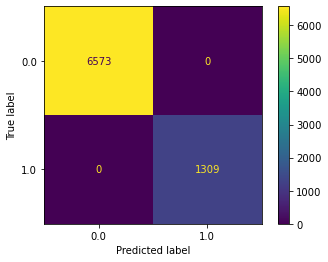

In [139]:
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(RF_model,X_train,y_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.970396684428656

 for test data
[[2780   11]
 [  89  498]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2791
         1.0       0.98      0.85      0.91       587

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.95      3378
weighted avg       0.97      0.97      0.97      3378



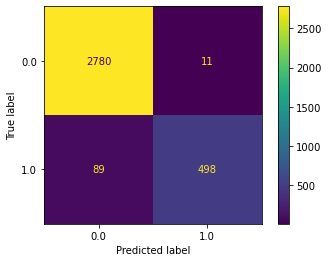

In [140]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(RF_model,X_test,y_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [141]:
pred_class_train3 = RF_model.predict(X_train)
pred_class_test3 = RF_model.predict(X_test)

In [142]:
pred_prob_train3 = RF_model.predict_proba(X_train)
pred_prob_test3 = RF_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.993


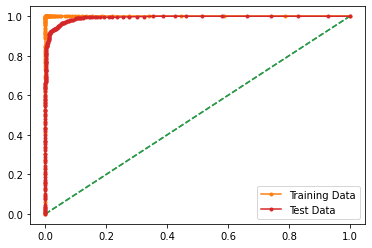

In [143]:
# AUC and ROC for the training data

# calculate AUC
RF_train_auc = metrics.roc_auc_score(y_train,pred_prob_train3[:,1])
print('AUC for the Training Data: %.3f' % RF_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
RF_test_auc = metrics.roc_auc_score(y_test,pred_prob_test3[:,1])
print('AUC for the Test Data: %.3f' % RF_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [144]:
fp=pd.DataFrame((RF_model.feature_importances_), columns = ["Imp"], index = X_train.columns)
fp.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.249983
cashback,0.087292
Day_Since_CC_connect,0.067521
CC_Contacted_LY,0.067500
rev_growth_yoy,0.062253
Complain_ly,0.061185
CC_Agent_Score,0.057129
rev_per_month,0.055923
account_segment,0.040805
Account_user_count,0.038485


In [145]:
#Bagging model
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

1.0

 for train data
[[6573    0]
 [   0 1309]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      1309

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



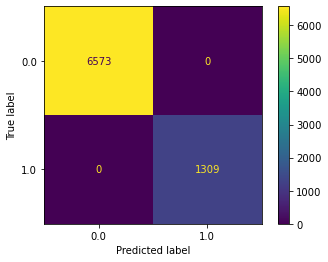

In [146]:
Bagging_model=BaggingClassifier(n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(Bagging_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9621077560686797

 for test data
[[2751   40]
 [  88  499]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2791
         1.0       0.93      0.85      0.89       587

    accuracy                           0.96      3378
   macro avg       0.95      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



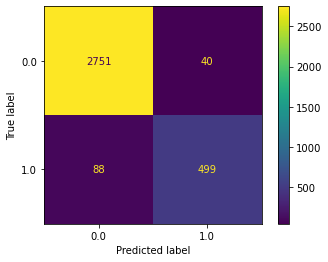

In [147]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(Bagging_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

In [148]:
pred_class_train4 = Bagging_model.predict(X_train)
pred_class_test4 = Bagging_model.predict(X_test)

In [149]:
pred_prob_train4 = Bagging_model.predict_proba(X_train)
pred_prob_test4 = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.986


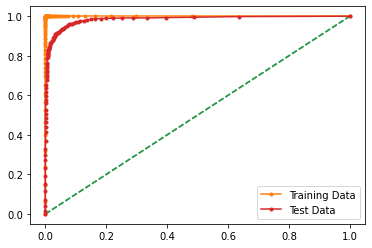

In [150]:
# AUC and ROC for the training data

# calculate AUC
Bg_train_auc = metrics.roc_auc_score(y_train,pred_prob_train4[:,1])
print('AUC for the Training Data: %.3f' % Bg_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Bg_test_auc = metrics.roc_auc_score(y_test,pred_prob_test4[:,1])
print('AUC for the Test Data: %.3f' % Bg_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [151]:
fp=pd.DataFrame((RF_model.feature_importances_), columns = ["Imp"], index = X_train.columns)
fp.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.249983
cashback,0.087292
Day_Since_CC_connect,0.067521
CC_Contacted_LY,0.067500
rev_growth_yoy,0.062253
Complain_ly,0.061185
CC_Agent_Score,0.057129
rev_per_month,0.055923
account_segment,0.040805
Account_user_count,0.038485


In [152]:
# Applying SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [153]:
pd.DataFrame(y_train).value_counts()

Churn
0.0      6573
1.0      1309
dtype: int64

In [154]:
pd.DataFrame(y_train_res).value_counts()

Churn
0.0      6573
1.0      6573
dtype: int64

0.7880402605091771

 for test data
[[2207  584]
 [ 132  455]]
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      2791
         1.0       0.44      0.78      0.56       587

    accuracy                           0.79      3378
   macro avg       0.69      0.78      0.71      3378
weighted avg       0.86      0.79      0.81      3378



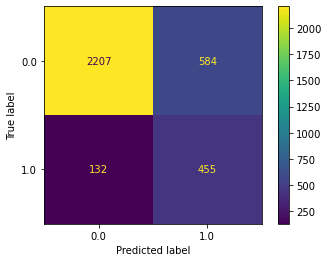

In [155]:
#Logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X_train_res,y_train_res)
y_predict = logit_model.predict(X_test)
model_score = logit_model.score(X_test, y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(logit_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


0.7977670641969044

 for train data
[[5243 1330]
 [ 264 1045]]
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      6573
         1.0       0.44      0.80      0.57      1309

    accuracy                           0.80      7882
   macro avg       0.70      0.80      0.72      7882
weighted avg       0.87      0.80      0.82      7882



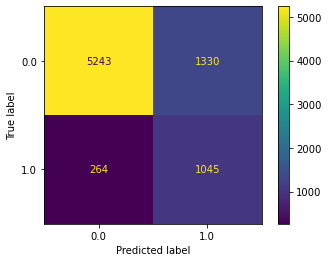

In [156]:
logit_model = LogisticRegression()
logit_model.fit(X_train_res,y_train_res)
y_predict = logit_model.predict(X_train)
model_score = logit_model.score(X_train, y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(logit_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(classification_report(y_train, y_predict))


In [157]:
log_prob=logit_model.predict_proba(X_test)
log_prob

array([[0.18162907, 0.81837093],
       [0.67378225, 0.32621775],
       [0.93487324, 0.06512676],
       ...,
       [0.82735351, 0.17264649],
       [0.4697774 , 0.5302226 ],
       [0.95197086, 0.04802914]])

In [158]:
log_auc_score=roc_auc_score(y_test,log_prob[:,1])
log_auc_score

0.860682639562429

0.9689165186500888

 for train data
[[6332  241]
 [   4 1305]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      6573
         1.0       0.84      1.00      0.91      1309

    accuracy                           0.97      7882
   macro avg       0.92      0.98      0.95      7882
weighted avg       0.97      0.97      0.97      7882



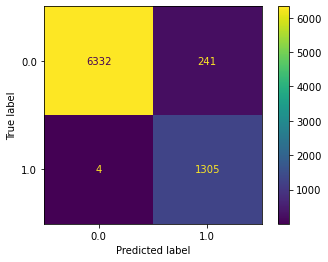

In [159]:
#KNN Model
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_res, y_train_res)
y_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train,y_train)
print(model_score)
print("\n for train data")
plot_confusion_matrix(KNN_model,X_train,y_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train,y_predict))

0.9236234458259325

 for test data
[[2557  234]
 [  24  563]]
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2791
         1.0       0.71      0.96      0.81       587

    accuracy                           0.92      3378
   macro avg       0.85      0.94      0.88      3378
weighted avg       0.94      0.92      0.93      3378



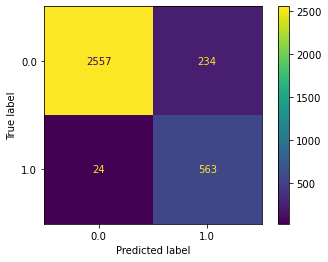

In [160]:
y_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test,y_test)
print(model_score)
print("\n for test data")
plot_confusion_matrix(KNN_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

In [161]:
KNN_prob=KNN_model.predict_proba(X_test)
KNN_prob

array([[0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ]])

In [162]:
KNN_auc_score=roc_auc_score(y_test,log_prob[:,1])
KNN_auc_score

0.860682639562429

In [163]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=200, random_state=1)
RF_model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=1)

1.0

 for train data
[[6573    0]
 [   0 6573]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      6573

    accuracy                           1.00     13146
   macro avg       1.00      1.00      1.00     13146
weighted avg       1.00      1.00      1.00     13146



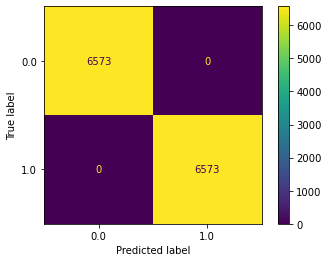

In [164]:
from sklearn import metrics
Y_train_predict = RF_model.predict(X_train_res)
model_score_rfs =RF_model.score(X_train_res, y_train_res)
print(model_score_rfs)
print("\n for train data")
plot_confusion_matrix(RF_model,X_train_res,y_train_res)
print(metrics.confusion_matrix(y_train_res, Y_train_predict))
print(metrics.classification_report(y_train_res, Y_train_predict))

0.9618117229129662

 confusion metrix on test data
[[2745   46]
 [  83  504]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2791
         1.0       0.92      0.86      0.89       587

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



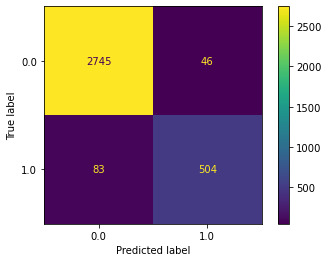

In [165]:
y_test_predict = RF_model.predict(X_test)
model_score_rfs = RF_model.score(X_test, y_test)
print(model_score_rfs)
print("\n confusion metrix on test data")
plot_confusion_matrix(RF_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [166]:
fp=pd.DataFrame((RF_model.feature_importances_), columns = ["Imp"], index = X_train.columns)
fp.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.274625
Day_Since_CC_connect,0.065647
cashback,0.064075
Complain_ly,0.060857
account_segment,0.060321
CC_Agent_Score,0.058088
rev_per_month,0.057545
rev_growth_yoy,0.051342
CC_Contacted_LY,0.050526
Account_user_count,0.050418


In [167]:
rf_prob=RF_model.predict_proba(X_test)
rf_prob

rf_auc_score=roc_auc_score(y_test,rf_prob[:,1])
rf_auc_score

0.9899711105970334

In [168]:
#Bagging model
from sklearn.ensemble import BaggingClassifier
Bagging_model = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

BaggingClassifier(n_estimators=50, random_state=1)

In [169]:
y_predict = Bagging_model.predict(X_test)
print(Bagging_model.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9520426287744227
[[2713   78]
 [  84  503]]


1.0

 confusion metrix on train data
[[6573    0]
 [   0 6573]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      6573

    accuracy                           1.00     13146
   macro avg       1.00      1.00      1.00     13146
weighted avg       1.00      1.00      1.00     13146



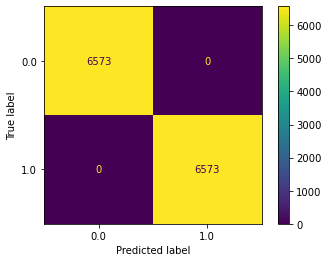

In [170]:
from sklearn import metrics
y_train_predict = Bagging_model.predict(X_train_res)
model_score_rfs =Bagging_model.score(X_train_res, y_train_res)
print(model_score_rfs)
print("\n confusion metrix on train data")
plot_confusion_matrix(Bagging_model,X_train_res,y_train_res)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9520426287744227

 confusion metrix on test data
[[2713   78]
 [  84  503]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2791
         1.0       0.87      0.86      0.86       587

    accuracy                           0.95      3378
   macro avg       0.92      0.91      0.92      3378
weighted avg       0.95      0.95      0.95      3378



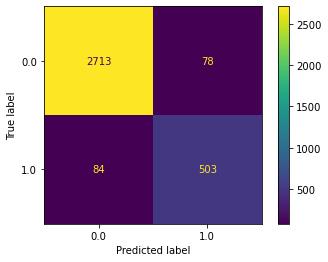

In [171]:
y_test_predict = Bagging_model.predict(X_test)
model_score_rfs = Bagging_model.score(X_test, y_test)
print(model_score_rfs)
print("\n confusion metrix on test data")
plot_confusion_matrix(Bagging_model,X_test,y_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

In [172]:
RF_prob= Bagging_model.predict_proba(X_test)
RF_prob

RF_auc_score=roc_auc_score(y_test,RF_prob[:,1])
RF_auc_score

0.9766757593310696

In [173]:
#Decision tree
from sklearn import tree
DT_model= tree.DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

1.0
[[6573    0]
 [   0 6573]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6573
         1.0       1.00      1.00      1.00      6573

    accuracy                           1.00     13146
   macro avg       1.00      1.00      1.00     13146
weighted avg       1.00      1.00      1.00     13146


 confusion metrix on train data


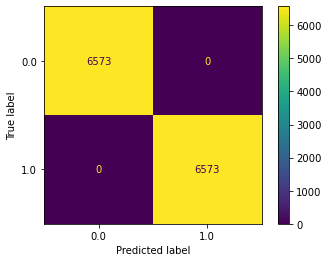

In [174]:
y_train_predict = DT_model.predict(X_train_res)
dt_train_model_score_sm = DT_model.score(X_train_res, y_train_res)
print(dt_train_model_score_sm)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

print("\n confusion metrix on train data")
plot_confusion_matrix(DT_model,X_train_res,y_train_res)

0.9168146832445234
[[2643  148]
 [ 133  454]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2791
         1.0       0.75      0.77      0.76       587

    accuracy                           0.92      3378
   macro avg       0.85      0.86      0.86      3378
weighted avg       0.92      0.92      0.92      3378


 confusion metrix on test data


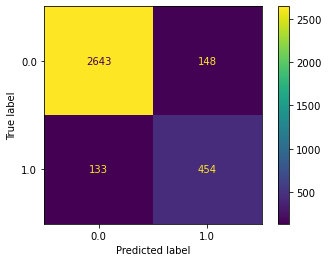

In [175]:
y_test_predict = DT_model.predict(X_test)
dt_test_model_score_sm = DT_model.score(X_test, y_test)
print(dt_test_model_score_sm)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

print("\n confusion metrix on test data")
plot_confusion_matrix(DT_model,X_test,y_test)

In [176]:
fp=pd.DataFrame((DT_model.feature_importances_), columns = ["Imp"], index = X_train.columns)
fp.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.376460
CC_Agent_Score,0.073743
Account_user_count,0.071181
Day_Since_CC_connect,0.065309
cashback,0.061294
rev_per_month,0.049586
Complain_ly,0.043077
CC_Contacted_LY,0.042228
rev_growth_yoy,0.037168
account_segment,0.030084


In [177]:
DT_prob=DT_model.predict_proba(X_test)
DT_prob
DT_auc_score=roc_auc_score(y_test,DT_prob[:,1])
DT_auc_score

0.8601983010613939

In [178]:
# Grid search CV (Ensemble method)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10],
    'min_samples_leaf': [100], 
    'min_samples_split': [300],
    'n_estimators': [250] 
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [179]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [100],
                         'min_samples_split': [300], 'n_estimators': [250]})

In [180]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 300,
 'n_estimators': 250}

In [181]:
best_grid = grid_search.best_estimator_

In [182]:
best_grid

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=250)

In [183]:
y_train_predict = best_grid.predict(X_train_res)
model_score =best_grid.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8649779400578123
[[5788  785]
 [ 990 5583]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      6573
         1.0       0.88      0.85      0.86      6573

    accuracy                           0.86     13146
   macro avg       0.87      0.86      0.86     13146
weighted avg       0.87      0.86      0.86     13146



In [184]:
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8510953226761397
[[2411  380]
 [ 123  464]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.91      2791
         1.0       0.55      0.79      0.65       587

    accuracy                           0.85      3378
   macro avg       0.75      0.83      0.78      3378
weighted avg       0.88      0.85      0.86      3378



In [185]:
dhj=pd.DataFrame((best_grid.feature_importances_), columns = ["Imp"], index = X_train.columns)
dhj.sort_values(by=["Imp"], ascending=False)

,Imp
Tenure,0.425629
Complain_ly,0.115960
account_segment,0.086309
Marital_Status_Married,0.062512
Day_Since_CC_connect,0.062161
cashback,0.039041
Account_user_count,0.036782
CC_Agent_Score,0.034391
rev_per_month,0.027553
Marital_Status_Single,0.019780


In [186]:
gr_prob=best_grid.predict_proba(X_test)
gr_prob
gr_auc_score=roc_auc_score(y_test,gr_prob[:,1])
gr_auc_score

0.9063520673959924